<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/modpred_Estrategias_Treinamento_%26_Validacao_Modelo_grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 3:**
* *Anna Carolina de Roldão*
* *Arthur Lira*
* *Erike Simon*
* *José Aparecido Silvano*
* *Yaci Mair da Silva Ribeiro*

# Estratégias de Treinamento - Exercício

## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn import preprocessing

In [ ]:
%matplotlib inline

# Usando o algoritmo PCA para diminuir a dimensionalidade



1.   Gere uma base de dados com make_classification (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)
4.   Faça a separação em treino e teste
5.   Utilize o algoritmo PCA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA e gere mais dois conjuntos de dados com 10 e 5 features, além dos dados originais
6.   Treine modelos de k-NN com os dados originais e os transformados
6.   Analise os resultados


**make_classification** é uma utilidade fornecida pela biblioteca scikit-learn em Python que permite gerar um conjunto de dados simulados para problemas de classificação. Esses dados são gerados de forma controlada, o que é útil para testar algoritmos de aprendizado de máquina, avaliar modelos e realizar experimentos.

* **X** (matriz de características)
* **y** (vetor de rótulos de classe)

Parâmetros da geração de dados:

* **n_samples**: O número total de amostras a serem geradas.
* **n_features:** O número de características (colunas) em cada amostra.
* **n_classes**: O número de classes no problema de classificação.
* **n_informative:** O número de características que têm relação direta com a classe.
* **n_redundant:** O número de características que são redundantes (linearmente dependentes) com outras características.
* **n_repeated:** O número de recursos duplicados, selecionados aleatoriamente dos recursos informativos e redundantes.
* **random_state:** Semente para a geração de números aleatórios, para garantir a reproducibilidade.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.249837,2.079998,-2.415743,1.552502,-0.020253,1.523087,1.508760,-0.449835,-0.047949,-0.364251,-0.167656,1.152433,-0.205154,1.674354,0.923366,-0.597097,-0.782575,0.284199,-0.279372,0.483238
1,-0.486287,2.432548,-2.819842,-1.703312,-1.318149,-1.184271,0.975993,-1.654944,1.080409,-0.739782,-0.268013,-0.626122,1.000353,1.644316,-0.160419,-1.008433,0.996747,-1.442006,0.378500,-0.821349
2,0.130374,1.371650,-1.486616,-1.749875,-0.281145,-0.747411,0.592592,-0.024075,1.139351,-1.018469,0.044192,-0.312338,-0.737030,1.900307,0.153546,1.281873,-0.002821,-0.307015,-0.079766,-0.813653
3,0.036658,0.963423,-1.689170,-0.144788,-0.409029,0.554625,-1.089267,-1.962814,-1.202401,1.805641,-0.467881,0.756017,1.875314,-0.097472,-1.916834,0.472943,0.138737,-1.187220,-1.291161,0.158436
4,1.564024,1.105053,-0.727427,-0.544666,0.303130,-0.240204,1.527715,0.002573,0.633612,-0.896717,0.006612,-1.045437,0.051558,-0.262640,-1.255730,0.854526,-2.024553,-0.483249,0.011380,-0.161171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.753272,1.350762,0.579777,1.355334,-0.682064,0.388216,0.499391,-0.287679,0.169421,1.199816,1.049459,2.229563,0.304981,1.031538,-0.268379,-1.402898,1.278386,2.454545,0.003742,1.175104
996,2.887198,2.005846,-0.527338,0.224019,-1.206909,-1.893959,-0.750064,-1.382790,-0.644107,1.030650,-0.794827,-1.475122,1.367025,-1.264167,1.434472,0.160110,-0.246771,-1.374850,-0.047521,1.142797
997,1.415506,1.622401,0.144164,1.343262,0.557403,-0.131092,1.874027,0.006228,0.259135,-0.031595,-1.055073,1.589037,0.069098,-0.338229,1.239979,-0.044653,0.115578,-2.300739,1.217180,-1.577991
998,0.512619,2.197778,1.178041,-1.861749,-0.717806,1.626153,-0.481092,1.581467,-0.315114,-0.510139,-0.556783,-1.045428,-0.615565,0.444112,-2.643913,-0.220775,1.265747,-0.127596,-1.177026,-0.312941


In [ ]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#                                                   # 1 parametro: X, 2 parametro: Y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.126584,-1.556869,-0.393826,-0.537029,0.244593,0.909225,-0.335435,-0.926489,0.030067,-1.041111,-1.894451,0.009549,-0.539616,0.335386,-0.610495,0.725847,-0.266054,-0.298323,0.981439,0.214337
1,-0.560851,0.007607,-1.250866,0.790119,-0.971438,2.171174,1.474813,2.019364,-0.887596,1.155326,1.903693,-1.628754,-1.335810,-0.057917,-0.558684,0.310031,0.812405,0.561879,0.550139,0.244694
2,-0.141132,-0.988946,1.703233,-1.191640,0.003872,0.052027,1.494709,0.266196,-0.594795,0.060193,2.255620,-0.780041,-1.034345,0.664241,0.161702,0.121052,0.278309,-1.236594,-0.747080,-0.397337
3,-0.751421,0.678175,-1.145951,-0.618201,-1.509645,0.453928,1.188726,1.441281,-1.256541,1.095307,-0.132422,0.088595,-0.069472,-0.083308,-1.232816,0.427011,0.882100,-1.373310,1.125968,-0.062110
4,-1.287418,-0.570223,1.944239,0.504160,1.469254,1.011170,0.698313,-0.430206,0.986950,0.343508,0.679335,-0.869308,-1.079720,1.243285,1.408410,0.094659,-0.417223,-0.898552,0.436590,-0.233951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.259228,0.093750,-0.170545,-0.145614,-0.305567,0.022338,0.033837,-1.033990,1.670193,-2.631995,-0.652061,-0.482154,-0.042979,-0.776220,2.106576,-0.489806,-0.448134,-0.737414,1.242988,-0.399053
696,-0.167795,-1.064876,0.548325,0.739557,1.040714,-0.821612,-0.690663,0.323779,0.196112,1.045185,0.573334,0.426461,0.164445,-0.550351,-0.788338,0.347695,0.557746,-1.679785,-0.758403,0.297600
697,1.102762,1.617529,-0.137752,-1.836307,1.447674,-0.261039,-0.631118,0.814594,-0.400019,0.197014,-1.418650,1.246415,-0.612698,0.062948,-0.794200,-1.133524,0.515778,-0.076092,0.226114,0.516449
698,0.460563,0.304735,1.743974,-0.164564,-1.225236,-1.031973,-1.476970,-0.771503,-1.015393,1.572609,-1.094883,0.622019,0.214341,0.145393,0.699119,-0.303463,-0.375053,0.381186,-2.088375,0.004993


## Utilizando o algoritmo PCA

In [ ]:
from sklearn.decomposition import PCA

### Com 10 features

In [ ]:
pca10 = PCA(n_components=10)

In [ ]:
# Ajusta o PCA ao conjunto de treinamento e transforma os dados de treinamento
X_train_pca10 = pca10.fit_transform(X_train)
# Transforma os dados de teste usando as mesmas transformações do PCA
X_test_pca10 = pca10.transform(X_test)

1. **fit_transform(X_train):** Calcula os componentes principais (PCs) e transforma os dados de treinamento.
2. **transform(X_test):** Aplica a mesma transformação (projeção nos PCs) aos dados de teste, usando os PCs calculados a partir dos dados de treinamento.

In [ ]:
pd.DataFrame(X_train_pca10)

,0,1,2,3,4,5,6,7,8,9
0,-0.403415,0.949991,-0.087822,0.608000,-1.875286,0.415293,-0.163935,-0.548710,-0.582523,1.941298
1,-1.095938,-0.790708,0.224108,-0.598849,-0.715290,1.267206,0.306884,-1.692510,0.674955,-0.475863
2,0.913792,2.076771,1.155947,-1.308760,0.934344,-0.684106,0.299904,-0.767156,0.814814,0.463853
3,-1.129805,-0.604220,-1.909362,-0.498973,0.534841,0.483538,0.742637,-1.642267,0.117598,-0.036325
4,0.035723,2.519087,1.393636,-1.695639,-0.837996,0.361739,0.383346,-0.797692,-0.161532,0.258834
...,...,...,...,...,...,...,...,...,...,...
695,0.817737,-0.237524,0.937895,-1.985480,-1.220079,0.514399,-0.516056,0.062583,0.342538,1.845664
696,0.435193,1.263991,-0.331422,-0.033384,0.119495,0.343694,0.040526,0.171431,0.851471,-1.310733
697,0.927367,-0.733271,-0.558973,0.278573,0.266024,-1.748133,0.949561,0.051204,-1.784800,-0.366710
698,1.118572,1.211115,-1.267668,1.451012,0.554190,-1.578721,-0.178965,0.447025,-0.278387,-0.660252


In [ ]:
print(pca10.explained_variance_ratio_)

[0.09823297 0.09480138 0.0589045  0.05637678 0.05478465 0.05074289
 0.05046501 0.0488245  0.04806336 0.04718303]


Proporção da variância explicada por cada um dos componentes principais calculados. A variância explicada é uma medida que indica quanto da variabilidade total dos dados é capturada por cada componente principal.

In [ ]:
print(pca10.singular_values_)

[39.09203847 38.40316409 30.27149882 29.61486822 29.19369891 28.0961809
 28.01914458 27.55996013 27.34429613 27.09271719]


Valores singulares associados a cada componente principal. Os valores singulares são úteis para entender a importância relativa de cada componente principal na decomposição dos dados originais.

### Com 5 features

In [ ]:
pca5 = PCA(n_components=5)

In [ ]:
# Ajusta o PCA ao conjunto de treinamento e transforma os dados de treinamento
X_train_pca5 = pca5.fit_transform(X_train)
# Transforma os dados de teste usando as mesmas transformações do PCA
X_test_pca5 = pca5.transform(X_test)

In [ ]:
pd.DataFrame(X_train_pca5)

,0,1,2,3,4
0,-0.409333,0.939214,-0.264643,0.090990,-2.039612
1,-1.098447,-0.818379,0.194969,1.137836,-0.444428
2,0.908618,2.073418,1.255201,1.202278,1.241033
3,-1.129306,-0.609081,-2.001581,1.144988,0.716219
4,0.004335,2.485447,1.556732,1.658257,-0.590875
...,...,...,...,...,...
695,0.839375,-0.166069,1.563437,1.372743,-0.906609
696,0.441824,1.273672,-0.094490,-0.248165,0.121372
697,0.907658,-0.746837,-0.875614,0.064638,0.099696
698,1.138735,1.217994,-1.382752,-1.023855,0.412795


In [ ]:
print(pca5.explained_variance_ratio_)

[0.09822615 0.09477665 0.05843584 0.05517551 0.05441286]


In [ ]:
print(pca5.singular_values_)

[39.09068117 38.39815414 30.15083187 29.29765431 29.09446993]


## Treinando os modelos com todas as features, com 10 e 5 do PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

### Todas as features

Padronização dos dados projetados

In [ ]:
# Normalizar todas as features como primeira abordagem
scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Treinamento

In [ ]:
# Treina e avalia o modelo KNN nos dados padronizados
neigh_k1 = KNeighborsClassifier(n_neighbors=1)
neigh_k1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

### Todas 10 features

1. projetar apenas os dados originais de treinamento de entrada X_train e X_test em um espaço de dimensão reduzida
2. avaliar se estes novos dados projetdos precisam ser normalizados
3. treinar o modelo pelo knn

O "treinamento" envolve apenas o ajuste do PCA aos seus dados, e o uso dos componentes principais resultantes para reduzir a dimensionalidade dos seus dados.

Padronização dos dados projetados

In [ ]:
# Padronizar os dados projetados antes de aplicar o KNN
scaler_pca10 = StandardScaler()

X_train_pca10_scaled = scaler_pca10.fit_transform(X_train_pca10)
X_test_pca10_scaled = scaler_pca10.transform(X_test_pca10)

Treinamento

In [ ]:
# Treina e avalia o modelo KNN nos dados padronizados
neigh_k1_pca10 = KNeighborsClassifier(n_neighbors=1)
neigh_k1_pca10.fit(X_train_pca10_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

### Todas 5 features

Padronização dos dados projetados

In [ ]:
# Padronizar os dados projetados antes de aplicar o KNN
scaler_pca5 = StandardScaler()

X_train_pca5_scaled = scaler_pca5.fit_transform(X_train_pca5)
X_test_pca5_scaled = scaler_pca5.transform(X_test_pca5)

Treinamento

In [ ]:
# Treina e avalia o modelo KNN nos dados padronizados
neigh_k1_pca5 = KNeighborsClassifier(n_neighbors=1)
neigh_k1_pca5.fit(X_train_pca5_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

## Analisando os resultados dos experimentos

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

### Com todas as features

In [ ]:
# Usa o método predict para fazer previsões (y) a partir dos dados de teste (X_test_scaled)
y_pred_k1 = neigh_k1.predict(X_test_scaled)
print(y_pred_k1)

[1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 0 0 1]


<Figure size 1600x1200 with 0 Axes>

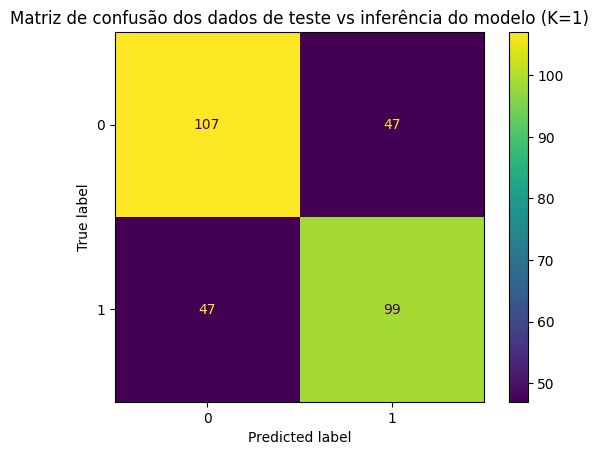

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_k1) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (K=1)")
plt.show()

Calculando as probabilidades para o modelo

In [ ]:
print(classification_report(y_test, y_pred_k1))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       154
           1       0.68      0.68      0.68       146

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



### Com 10 features

In [ ]:
# Usa o método predict para fazer previsões (y) a partir dos dados de teste (X_test_pca10_scaled)
y_pred_k1_pca10 = neigh_k1_pca10.predict(X_test_pca10_scaled)
print(y_pred_k1_pca10)

[1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1
 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1
 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1]


<Figure size 1600x1200 with 0 Axes>

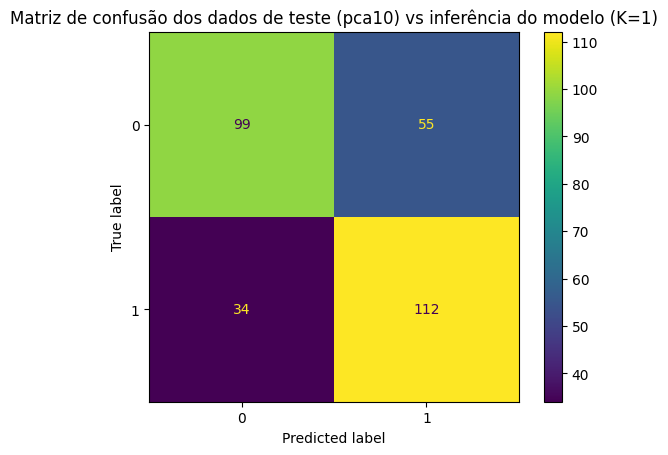

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_k1_pca10) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
cmd.plot()
plt.title("Matriz de confusão dos dados de teste (pca10) vs inferência do modelo (K=1)")
plt.show()

Calculando as probabilidades para o modelo

In [ ]:
print(classification_report(y_test, y_pred_k1_pca10))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       154
           1       0.67      0.77      0.72       146

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.71      0.70      0.70       300



### Com 5 features

In [ ]:
# Usa o método predict para fazer previsões (y) a partir dos dados de teste (X_test_pca10_scaled)
y_pred_k1_pca5 = neigh_k1_pca5.predict(X_test_pca5_scaled)
print(y_pred_k1_pca5)

[0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1
 0 0 0 1]


<Figure size 1600x1200 with 0 Axes>

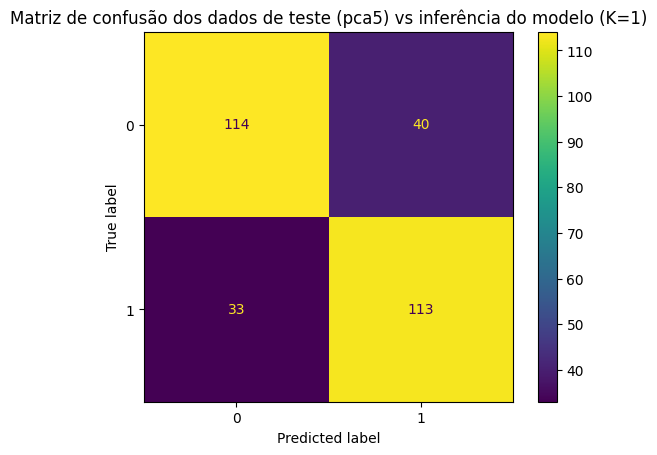

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_k1_pca5) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
cmd.plot()
plt.title("Matriz de confusão dos dados de teste (pca5) vs inferência do modelo (K=1)")
plt.show()

Calculando as probabilidades para o modelo

In [ ]:
print(classification_report(y_test, y_pred_k1_pca5))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       154
           1       0.74      0.77      0.76       146

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



## Obtenha os dados
** Leia o arquivo csv 'Arvore_Decisao_Iris_Data.csv' em um DataFrame **

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/Arvore_Decisao_Iris_Data.csv')

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
df.columns = columns

In [ ]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Convertendo o target em labels numérica

In [ ]:
# Criando uma instância do LabelEncoder, que é uma classe que nos ajuda a codificar rótulos categóricos em valores numéricos
le = preprocessing.LabelEncoder()

In [ ]:
# Ajusta o codificador aos valores da coluna 'class'. Isso permite que o codificador saiba quais rótulos estão presentes nos dados e os associe a valores numéricos específicos
le.fit(df['class'])

LabelEncoder()

In [ ]:
# Transformando os rótulos da cluna 'class' em valores numéricos usando o codificador e atribuindo a uma nova coluna 'le_class'
df['class_le'] = le.transform(df['class'])

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,class,class_le
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,2
145,6.3,2.5,5.0,1.9,Iris-virginica,2
146,6.5,3.0,5.2,2.0,Iris-virginica,2
147,6.2,3.4,5.4,2.3,Iris-virginica,2


* class_le = 0 (Iris-setosa)
* class_le = 1 (Iris-versicolor)
* class_le = 2 (Iris-virginica)

In [ ]:
df.drop(columns=['class'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class_le      149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class_le
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369,1.006711
std,0.828594,0.433499,1.759651,0.761292,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop(columns=['class_le']),
                                                        df['class_le'],
                                                        test_size=0.3,
                                                        random_state=111)

# Padronize as variáveis


Converta as variáveis independentes com o StandardScaler

In [ ]:
# Padronizar os dados projetados antes de aplicar o KNN
scaler1 = StandardScaler()

X_train1_scaled = scaler1.fit_transform(X_train1)
X_test1_scaled = scaler1.transform(X_test1)

# Usando o algoritmo Random Forest como Feature Selection

Importe o RandomForestClassfier e SelectFromModel do scikit learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score

In [ ]:
# Cria uma instância do RandomForestClassifier
clf = RandomForestClassifier()

O valor padrão do parâmetro **random_state** no RandomForestClassifier() do scikit-learn é None. Isso significa que, por padrão, o algoritmo não usará uma semente aleatória fixa e a geração de números aleatórios será diferente a cada vez que o modelo for treinado. Isso pode levar a resultados ligeiramente diferentes a cada execução.

Para obter resultados consistentes e reprodutíveis, é uma boa prática definir explicitamente um valor para o **random_state**. Isso garantirá que o treinamento do modelo seja feito com a mesma semente aleatória em diferentes execuções.

In [ ]:
# Treina o modelo nos dados de treinamento padronizados
clf.fit(X_train1_scaled, y_train1)

RandomForestClassifier()

In [ ]:
# Faz previsões nos dados de teste padronizados
y_pred1 = clf.predict(X_test1_scaled)

Analisando a accuracy:

In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
print(accuracy)

1.0


Analisando as características importantes (feature importances) do *dataset*

In [ ]:
clf.feature_importances_

array([0.12728425, 0.02829072, 0.42109458, 0.42333044])

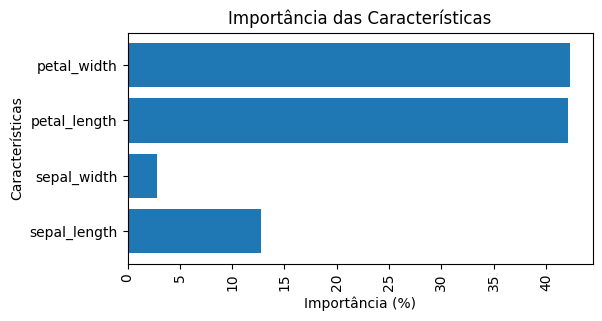

In [ ]:
# Importâncias das características do classificador treinado
feature_importances = clf.feature_importances_

# Labels das características
feature_names = X_train1.columns

plt.figure(figsize=(6, 3))
plt.barh(range(len(feature_importances)), feature_importances*100, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Importância (%)')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()

Referência: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## Utilizando e analisando feature selection do modelo Random Forest via SelectFromModel

O método **SelectFromModel** é uma maneira útil de realizar seleção de características com base nas importâncias calculadas pelo modelo.

pode usá-lo para selecionar automaticamente as características mais importantes do seu 'RandomForestClassifier' definido anteriormente.

In [ ]:
# Criar o objeto SelectFromModel
sfm = SelectFromModel(clf)  # Defina o limiar de importância (threshold) aqui

In [ ]:
# Ajusta o objeto SelectFromModel aos dados de treinamento
sfm.fit(X_train1_scaled, y_train1)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
# Pega apenas as características mais importantes selecionadas
sfm.get_support()

array([False, False,  True,  True])

In [ ]:
X_train1.columns[sfm.get_support()]

Index(['petal_length', 'petal_width'], dtype='object')

In [ ]:
len(X_train1.columns[sfm.get_support()])

2

## Validação Cruzada com k-NN

A validação cruzada (*cross validation*) é uma técnica usada para avaliar o desempenho do modelo de forma mais robusta, evitando possíveis viéses que podem ocorrer ao dividir os dados em conjuntos de treinamento e teste apenas uma vez.

### Aplique a validação cruzada para as bases de dados utilizadas neste exercício

Utilize o conjunto de dados gerados a partir do sklearn. Primeira parte dos exercícios - PCA.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

#### Dados gerados com a função do sklearn

In [ ]:
# Criar um modelo knn novo
neigh_cross_mc = KNeighborsClassifier(n_neighbors=1)

# Aplica a validação cruzada com 8 folds (dobras)
scores_mc = cross_val_score(neigh_cross_mc, X_train_scaled, y_train, cv=8) # 'cv': número de folds

'*cross_val_score()*' retorna apenas uma matriz de pontuações de validação cruzada para uma métrica específica (por exemplo, precisão, R², etc.). É uma maneira rápida e conveniente de obter uma visão geral do desempenho do modelo em diferentes folds.

Por padrão, o método '*cross_val_score()*' do divide os dados de treinamento em 5 *folds* durante o processo de validação. Quanto mais *folds* você usar, mais preciso será o cálculo das métricas de avaliação, pois cada *fold* representa uma estimativa diferente do desempenho do modelo. No entanto, usar muitos folds também pode aumentar a variabilidade das estimativas, o que pode tornar mais difícil tirar conclusões sólidas.

In [ ]:
scores_mc

array([0.70454545, 0.78409091, 0.60227273, 0.69318182, 0.57471264,
       0.64367816, 0.73563218, 0.65517241])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_mc.mean(), scores_mc.std() * 2))

Accuracy: 0.67 (+/- 0.13)


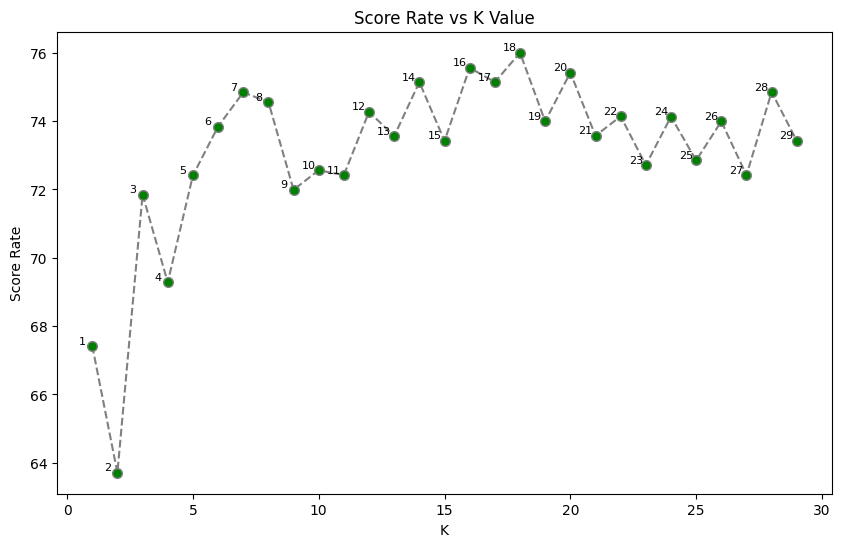

In [ ]:
from sklearn.model_selection import cross_val_score

# Armazenar os scores dos modelos
score = []

for i in range(1,30):
  neigh_cross = KNeighborsClassifier(n_neighbors=i)

  scores = cross_val_score(neigh_cross, X_train_scaled, y_train, cv=8)

  score.append(round((scores.mean()*100), 2)) # armazena as médias dos 8 'splits' de cada modelo

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='grey', linestyle='dashed', marker='o',
           markerfacecolor = 'green', markersize=7)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

# Adicionar os valores do eixo x acima de cada marcador
for i, scr in enumerate(score):
    plt.text(i+0.6, scr+0.001, str(i+1), ha='center', va='bottom', fontsize=8)

plt.show()

De acordo com o gráfico acima, o melhor *score* foi obtido para *k=18*

In [ ]:
neigh_k18 = KNeighborsClassifier(n_neighbors=18)
neigh_k18.fit(X_train_scaled, y_train)
y_pred_k18 = neigh_k18.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_k18))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       154
           1       0.73      0.84      0.78       146

    accuracy                           0.77       300
   macro avg       0.78      0.78      0.77       300
weighted avg       0.78      0.77      0.77       300



<Figure size 1600x1200 with 0 Axes>

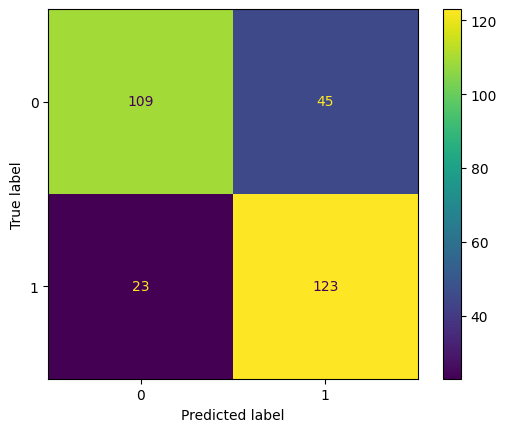

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_k18) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
cmd.plot()
plt.show()

#### Dados Iris

Ponto extra

In [ ]:
neigh_cross_iris = KNeighborsClassifier(n_neighbors=1)

# Aplica a validação cruzada com 8 folds (dobras)
scores_iris = cross_val_score(neigh_cross_iris, X_train1_scaled, y_train1, cv=8) # 'cv': número de folds

In [ ]:
scores_iris

array([0.84615385, 0.92307692, 1.        , 0.69230769, 1.        ,
       1.        , 1.        , 0.92307692])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_iris.mean(), scores_iris.std() * 2))

Accuracy: 0.92 (+/- 0.20)


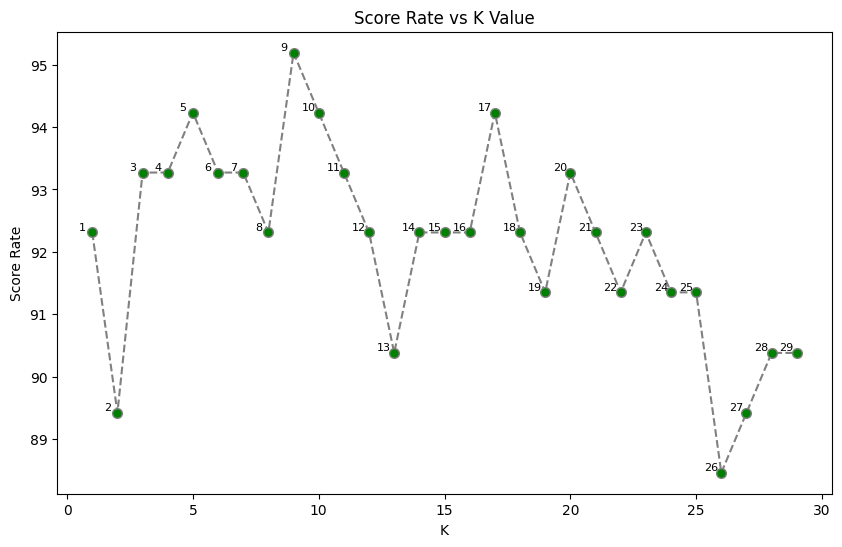

In [ ]:
from sklearn.model_selection import cross_val_score

score = []

for i in range(1,30):
  neigh_cross = KNeighborsClassifier(n_neighbors=i)

  scores = cross_val_score(neigh_cross, X_train1_scaled, y_train1, cv=8)

  score.append(round((scores.mean()*100), 2)) # armazena as médias dos 8 'splits' de cada modelo

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='grey', linestyle='dashed', marker='o',
           markerfacecolor = 'green', markersize=7)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

# Adicionar os valores do eixo x acima de cada marcador
for i, scr in enumerate(score):
    plt.text(i+0.6, scr+0.001, str(i+1), ha='center', va='bottom', fontsize=8)

plt.show()

De acordo com o gráfico acima, o melhor *score* foi obtido para *k=9*

In [ ]:
neigh_k9 = KNeighborsClassifier(n_neighbors=9)
neigh_k9.fit(X_train1_scaled, y_train1)
y_pred_k9 = neigh_k9.predict(X_test1_scaled)

In [ ]:
print(classification_report(y_test1, y_pred_k9))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Figure size 1600x1200 with 0 Axes>

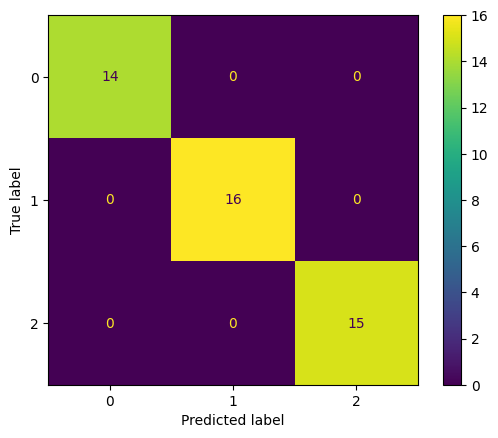

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test1, y_pred_k9) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test1))
cmd.plot()
plt.show()

## Conclusão

Os resultados revelam que, ao empregar todos os atributos sem qualquer redução de dimensionalidade, a acurácia atingiu 69%. No entanto, ao reduzir as dimensões para 10 atributos, a acurácia aumentou para 70%. Ao reduzir ainda mais para 5 atributos, a acurácia alcançou 76%. Esses resultados demonstram uma clara tendência de melhoria na acurácia à medida que a dimensionalidade dos dados foi reduzida.

Ao aplicar o *Random Forest* ao dataset *Iris Data*, alcancou-se uma acurácia de 100%. Isso indica que o modelo foi capaz de fazer previsões corretas para todas as instâncias presentes no dataset.

Ao utilizar o método *SelectFromModel* no conjunto de dados *Iris Data*, foram escolhidas duas características como as mais relevantes: Comprimento da Pétala (*Petal Length*) e Largura da Pétala (*Petal Width*). Isso sugere que, de acordo com a análise do *Random Forest*, essas duas características são as mais informativas e contribuem significativamente para a capacidade de discriminação e classificação das classes presentes no conjunto de dados *Iris*.

No processo de validação cruzada (*Cross-Validation*) aplicado aos dados gerados pelo método *Make Classification* empregando o algoritmo *K-Nearest Neighbors (KNN)*, foi notado um desempenho mais elevado com uma acurácia de 77% quando o valor do hiperparâmetro *K* foi definido como 18. Isso indica que a escolha desse valor específico para o número de vizinhos mais próximos resultou em um melhor ajuste do modelo aos dados e, consequentemente, em um aumento na precisão das previsões.

Ao aplicar a técnica de validação cruzada ao conjunto *Iris Data* e empregando novamente o algoritmo *K-Nearest Neighbors (KNN)* , notou-se uma surpreendente acurácia de 100% para *k*=9. Isso sugere que o modelo *KNN* com o hiperparâmetro igual a 9 foi capaz de realizar classificações perfeitas em todas as instâncias do conjunto de dados *Iris*, o que indica um excelente ajuste e desempenho na tarefa de classificação.